In [1]:
import sklearn.datasets
# conda install -c conda-forge scikit-learn
from sklearn import neighbors, tree, cluster
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt 
import numpy as np
import itertools as it

## Loading example data: Iris plants dataset
https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-dataset

In [2]:
iris = sklearn.datasets.load_iris()

In [3]:
type(iris)

sklearn.utils.Bunch

In [4]:
iris.data.shape, iris.data[:5]

((150, 4),
 array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2]]))

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

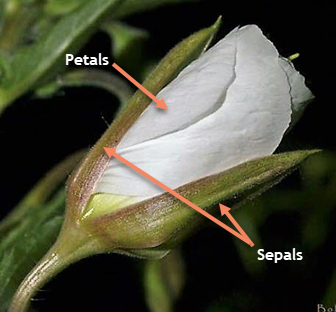

In [6]:
from IPython import display
display.Image("https://plantid.net/Classic/Glossary/Sepal_files/image001.png")

In [8]:
iris.target.shape, np.unique(iris.target, return_counts=True)

((150,), (array([0, 1, 2]), array([50, 50, 50])))

In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Plot feature combinations + labels

In [9]:
# a function that takes features, labels, selected pairs of features as inputs and displays a scattor plot 
def draw_scatter(data, labels, x_feature, y_feature):
    plt.scatter(data[:, x_feature], data[:, y_feature], c=labels, alpha=0.5, s=100)
    plt.xlabel(iris.feature_names[x_feature]), plt.ylabel(iris.feature_names[y_feature])
    plt.show()

(0, 'sepal length (cm)') (1, 'sepal width (cm)')


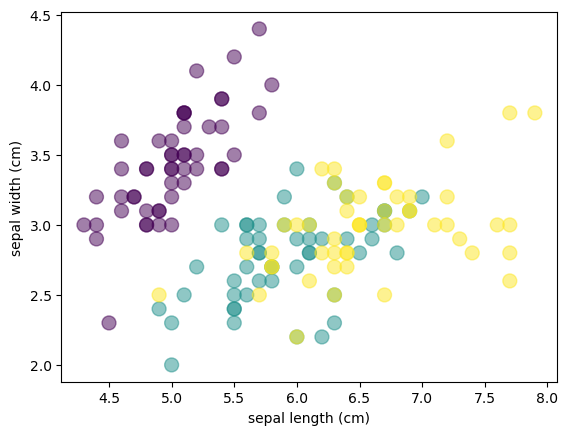

(0, 'sepal length (cm)') (2, 'petal length (cm)')


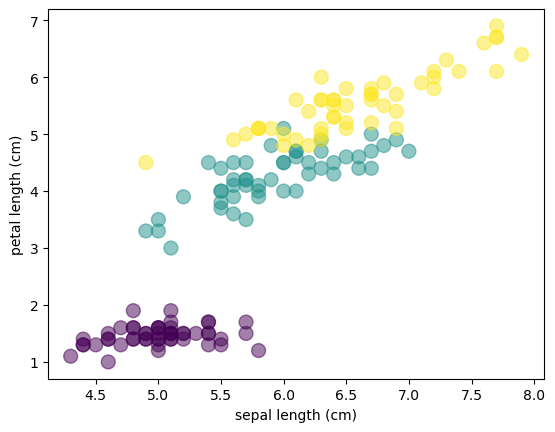

(0, 'sepal length (cm)') (3, 'petal width (cm)')


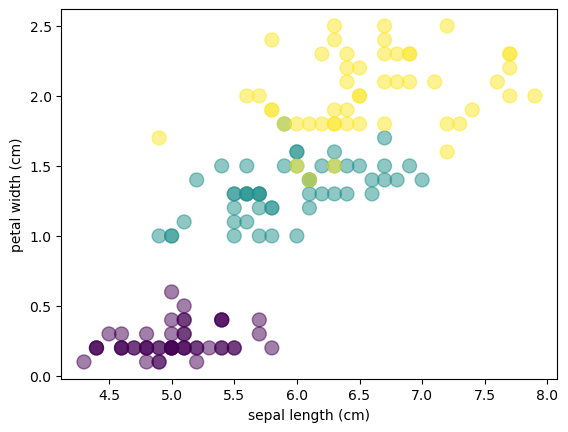

(1, 'sepal width (cm)') (2, 'petal length (cm)')


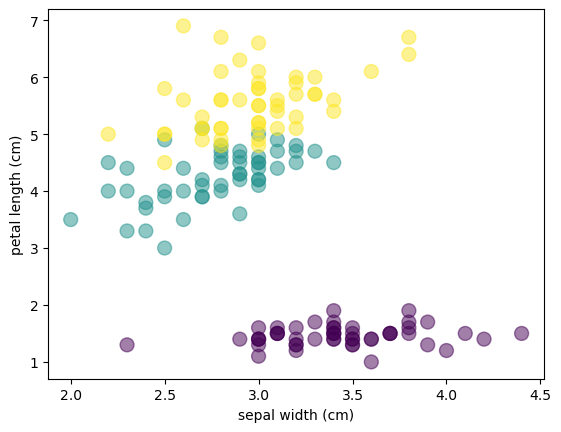

(1, 'sepal width (cm)') (3, 'petal width (cm)')


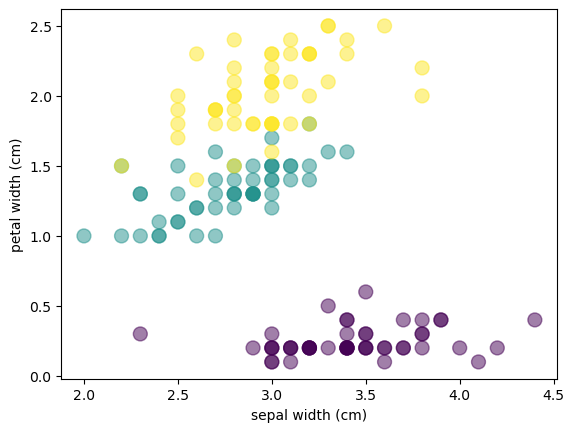

(2, 'petal length (cm)') (3, 'petal width (cm)')


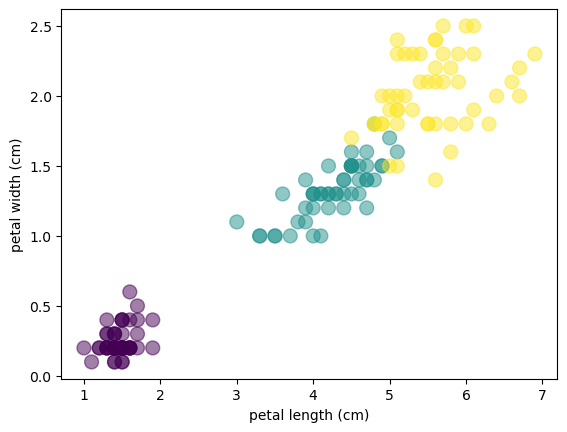

In [10]:
# visualize each pair of features and how well they discriminate the three classes 
for i, j in it.combinations(enumerate(iris.feature_names), 2):
    print (i, j)
    draw_scatter(iris.data, iris.target, i[0], j[0])

## ML Technique 1: Supervised Learning
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html  
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html  

In [ ]:
### Instantiate K-NN Classifier
# Note: no internal model constructed
# Class is computed from a simple majority vote of the nearest neighbors of each point
# clf = neighbors.KNeighborsClassifier(n_neighbors=1)

In [11]:
# Instantiate Decision Tree classifier
clf = tree.DecisionTreeClassifier()

In [12]:
clf

DecisionTreeClassifier()

In [ ]:
print ('feature names : ',iris.feature_names)
# print(iris.data)
print ('label names: ',iris.target_names)
print('labels : ',iris.target)

### Cross-validation and model evaluation
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html  
https://scikit-learn.org/stable/modules/model_evaluation.html  

In [13]:
def draw_confusion_matrix(y_test, y_pred, display_labels=None):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=display_labels)
    disp.plot()
    plt.show()

In [14]:
# K-fold cross-validator construction
kf = KFold(n_splits=5, shuffle=True, random_state=123)

TRAIN SAMPLE SIZE: 120
TEST SAMPLE SIZE: 30
Prediction:  [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 2 2 2 2 2 2 2 1 2 1 2]
Correct:     [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2]
Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.75      1.00      0.86         6
   virginica       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.92      0.94      0.92        30
weighted avg       0.95      0.93      0.93        30



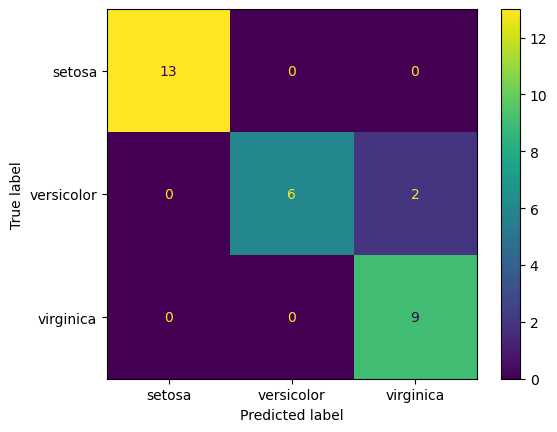

TRAIN SAMPLE SIZE: 120
TEST SAMPLE SIZE: 30
Prediction:  [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 1 2 2 2 2 2 2]
Correct:     [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2]
Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



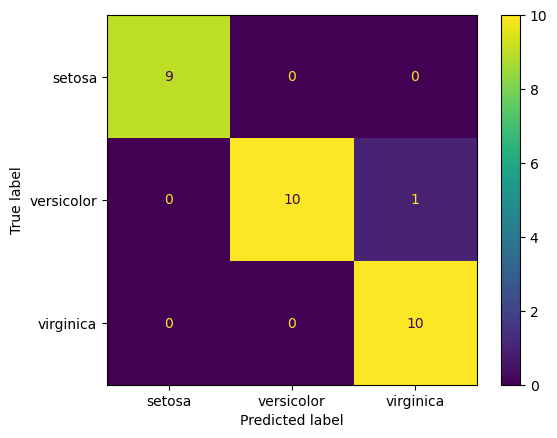

TRAIN SAMPLE SIZE: 120
TEST SAMPLE SIZE: 30
Prediction:  [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 2 1 1 1 1 1 2 2 2 2 2 2 2 2 2]
Correct:     [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2]
Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.90      0.95        10
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



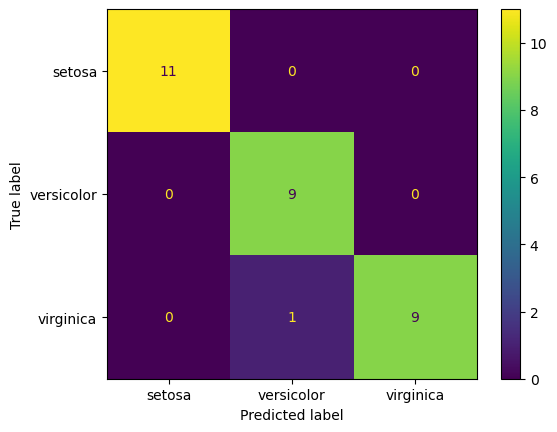

TRAIN SAMPLE SIZE: 120
TEST SAMPLE SIZE: 30
Prediction:  [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 2 1 1 1 1 1 2 2 2 2 2 2]
Correct:     [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2]
Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        13
   virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



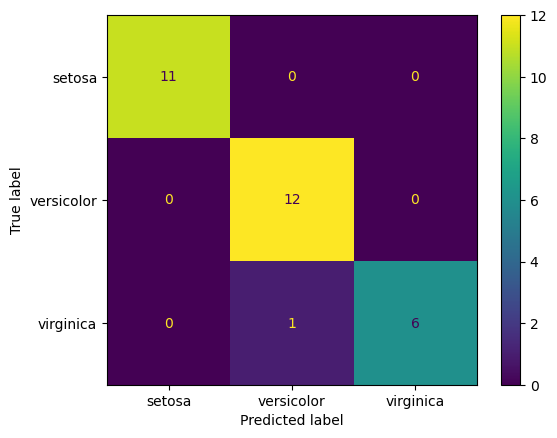

TRAIN SAMPLE SIZE: 120
TEST SAMPLE SIZE: 30
Prediction:  [0 0 0 0 0 0 1 1 1 1 1 1 1 2 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2 2]
Correct:     [0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2]
Accuracy: 0.9
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         6
  versicolor       0.83      0.91      0.87        11
   virginica       0.92      0.85      0.88        13

    accuracy                           0.90        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.90      0.90      0.90        30



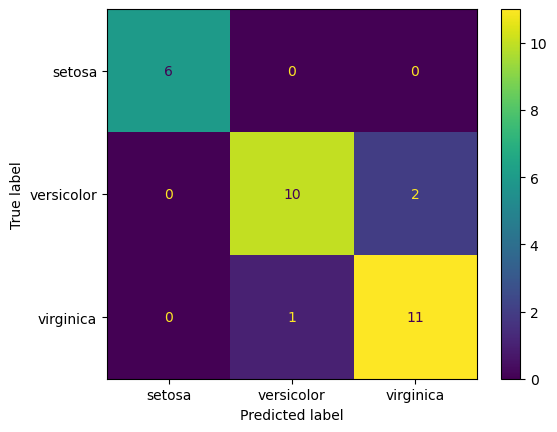

In [16]:
accuracy_scores = []
for train_index, test_index in kf.split(iris.data):
    clf = tree.DecisionTreeClassifier(max_depth=3)
    print("TRAIN SAMPLE SIZE:", len(train_index))
    print("TEST SAMPLE SIZE:", len(test_index))
    X_train, X_test = iris.data[train_index], iris.data[test_index]
    y_train, y_test = iris.target[train_index], iris.target[test_index]

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    train_pred = clf.predict(X_train)

    print ('Prediction: ', y_pred)
    print ('Correct:    ', y_test)
    print ('Accuracy:', accuracy_score(y_pred, y_test))
    print (classification_report(y_test, y_pred, target_names=iris.target_names))

    draw_confusion_matrix(y_pred,y_test,iris.target_names)
    acc = accuracy_score(y_pred,y_test)
    accuracy_scores.append(acc)

In [17]:
accuracy_scores

[0.9333333333333333,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9]

In [18]:
'{:.2f} +/- {:.3f}'.format(np.mean(accuracy_scores), np.std(accuracy_scores))

'0.95 +/- 0.027'

In [19]:
cv_scores = []
# K-fold cross validation and performance evaluation

for max_depth in [5,8,10,13,15]:
    accuracy_scores = []
    for train_index, test_index in kf.split(iris.data):
        clf = tree.DecisionTreeClassifier(max_depth=max_depth)
        X_train, X_test = iris.data[train_index], iris.data[test_index]
        y_train, y_test = iris.target[train_index], iris.target[test_index]

        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)
        train_pred = clf.predict(X_train)

        acc = accuracy_score(y_pred,y_test)
        accuracy_scores.append(acc)
    cv_scores.append({'acc': np.mean(accuracy_scores), 'max_depth' : max_depth})

In [20]:
cv_scores

[{'acc': 0.9533333333333334, 'max_depth': 5},
 {'acc': 0.9466666666666667, 'max_depth': 8},
 {'acc': 0.9533333333333334, 'max_depth': 10},
 {'acc': 0.9400000000000001, 'max_depth': 13},
 {'acc': 0.9466666666666667, 'max_depth': 15}]

### Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, make_scorer, r2_score, mean_absolute_percentage_error, explained_variance_score

#### Classification

In [22]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.30)

In [23]:
rf =  RandomForestClassifier(n_estimators=100, max_depth=10)

In [24]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [25]:
accuracy_score(y_test, rf.predict(X_test))

0.9555555555555556

#### Regression

In [26]:
rf =  RandomForestRegressor(n_estimators=100, max_depth=10)

In [67]:
rf.fit(iris.data, iris.target)

RandomForestRegressor(max_depth=10)

In [68]:
rf.feature_importances_

array([0.00663367, 0.00639634, 0.49784979, 0.4891202 ])

In [69]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [70]:
# R^2  
rf.score(iris.data, iris.target)

0.991694

In [71]:
# similar to R^2
explained_variance_score(iris.target, rf.predict(iris.data))

0.9916957066666666

In [66]:
# regression loss measures
mean_absolute_percentage_error(iris.target, rf.predict(iris.data))

0.015066666666666667

## ML Technique 2: Unsupervised Learning
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [32]:
# unsupervised k-means 
k_means = cluster.KMeans(n_clusters=2)
k_means.fit(iris.data)
k_means_label = k_means.labels_

In [33]:
np.unique(k_means.labels_)

array([0, 1], dtype=int32)

### Plot feature combindations + clusters (k = 2)

(0, 'sepal length (cm)') (1, 'sepal width (cm)')


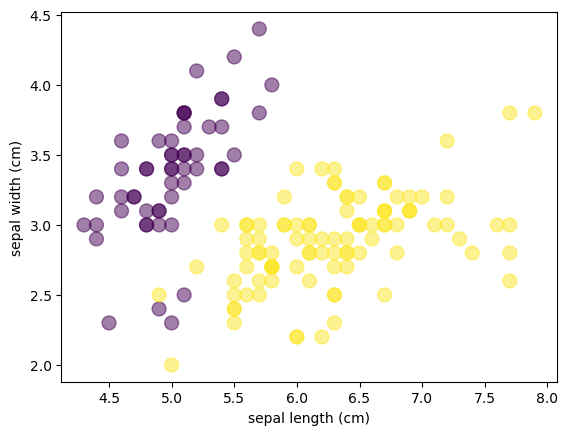

(0, 'sepal length (cm)') (2, 'petal length (cm)')


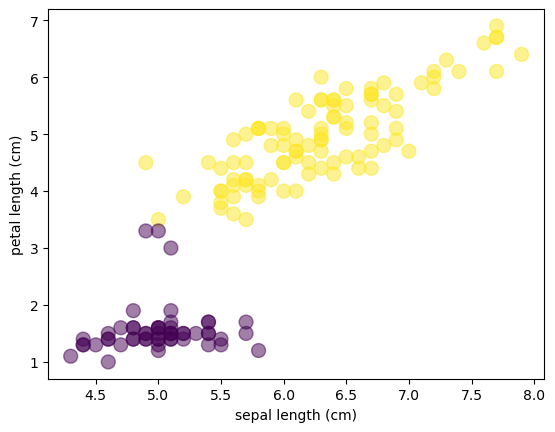

(0, 'sepal length (cm)') (3, 'petal width (cm)')


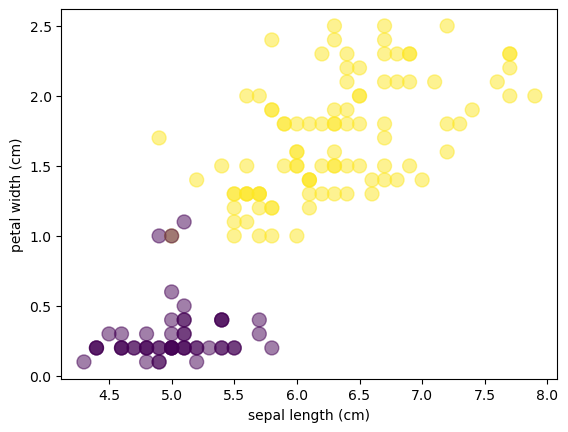

(1, 'sepal width (cm)') (2, 'petal length (cm)')


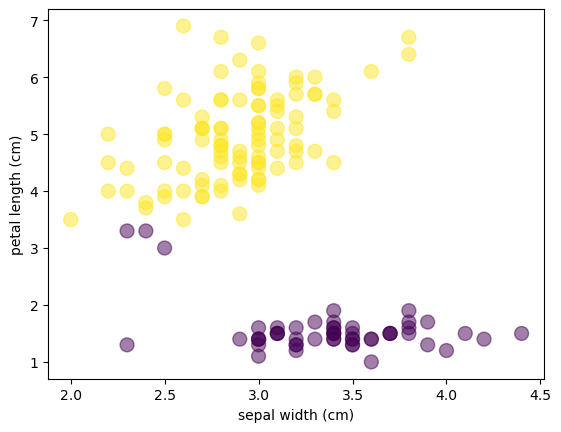

(1, 'sepal width (cm)') (3, 'petal width (cm)')


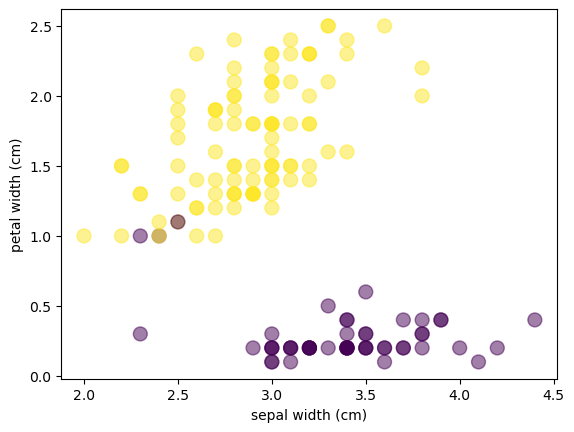

(2, 'petal length (cm)') (3, 'petal width (cm)')


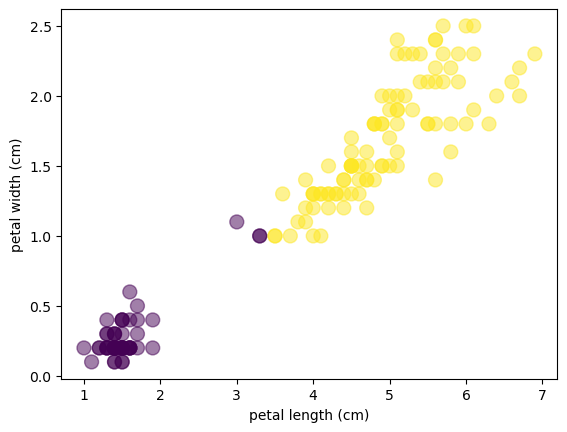

In [34]:
for i, j in it.combinations(enumerate(iris.feature_names), 2):
    print(i,j)
    draw_scatter(iris.data, k_means_label, i[0], j[0])

In [35]:
# unsupervised k-means 
k_means = cluster.KMeans(n_clusters=4)
k_means.fit(iris.data)
k_means_label = k_means.labels_

### Plot feature combindations + clusters (k = 4)

(0, 'sepal length (cm)') (1, 'sepal width (cm)')


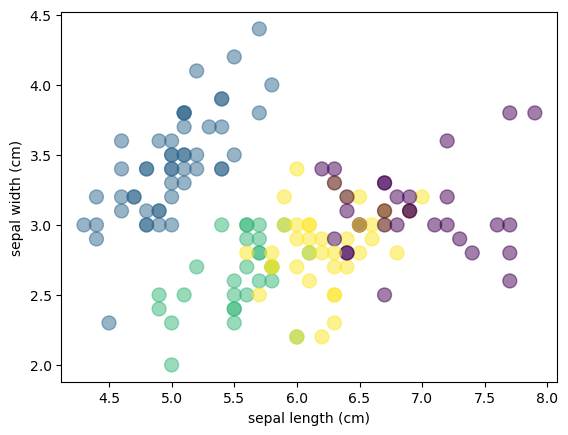

(0, 'sepal length (cm)') (2, 'petal length (cm)')


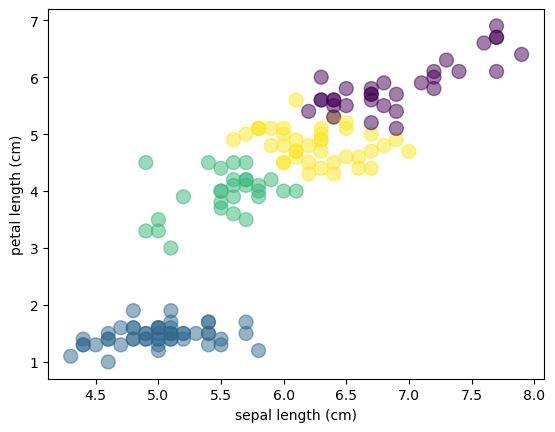

(0, 'sepal length (cm)') (3, 'petal width (cm)')


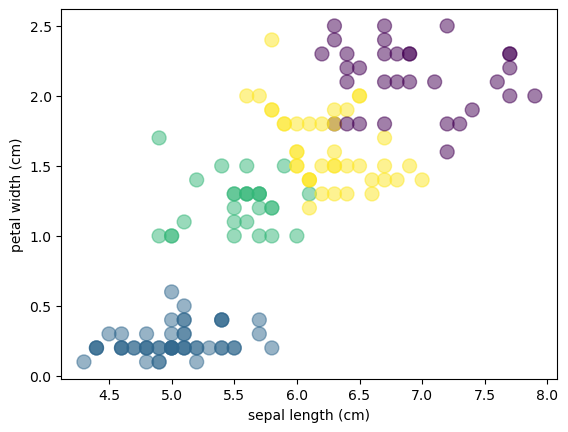

(1, 'sepal width (cm)') (2, 'petal length (cm)')


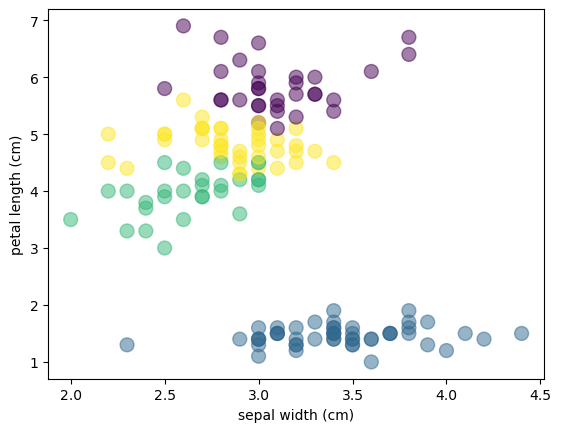

(1, 'sepal width (cm)') (3, 'petal width (cm)')


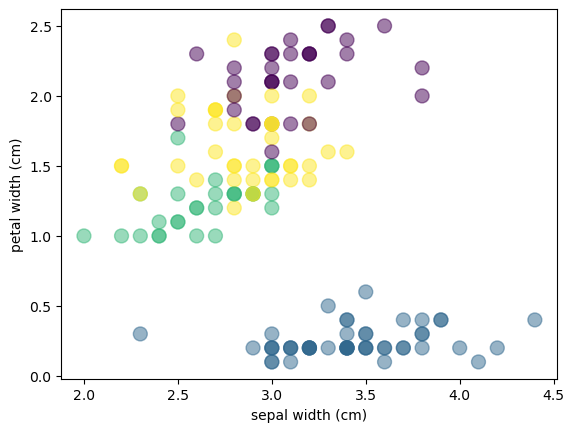

(2, 'petal length (cm)') (3, 'petal width (cm)')


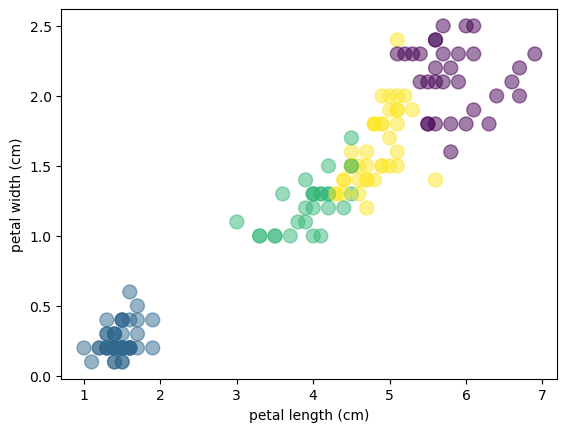

In [36]:
for i, j in it.combinations(enumerate(iris.feature_names), 2):
    print(i,j)
    draw_scatter(iris.data, k_means_label, i[0], j[0])

### Unsupervised learning evaluation: elbow plot

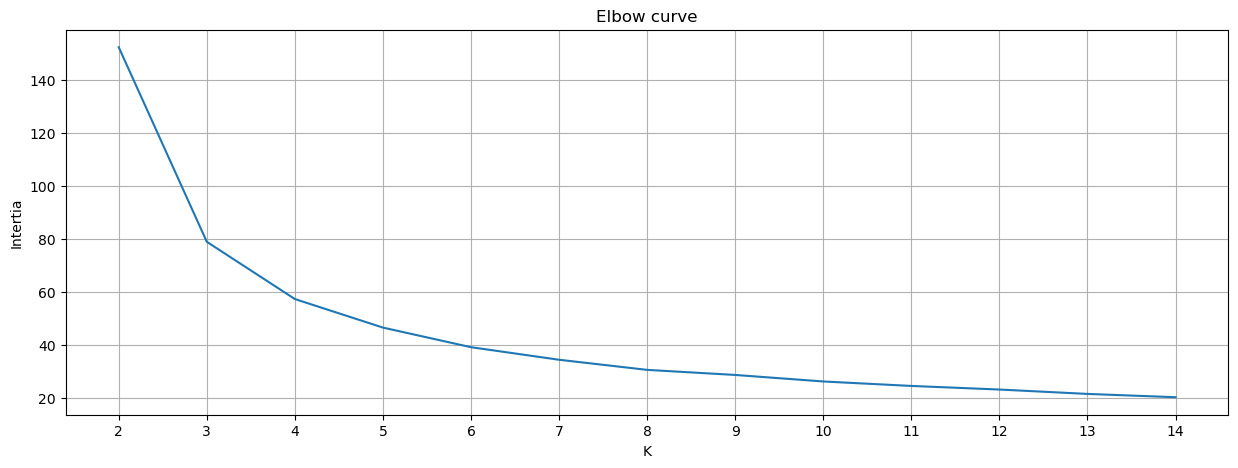

In [37]:
inertias = []
for k in range(2, 15):
    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(iris.data)
    inertias.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 15), inertias)
plt.grid(True)
plt.title('Elbow curve')
plt.xticks(list(range(2, 15)))
plt.xlabel('K')
_ = plt.ylabel('Intertia')

In [ ]:
# Sources:
# http://www.astro.washington.edu/users/vanderplas/Astr599/notebooks/18_IntermediateSklearn
# http://matplotlib.org/examples/pylab_examples/scatter_star_poly.html
# http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html
# http://scikit-learn.org/stable/auto_examples/plot_confusion_matrix.html#example-plot-confusion-matrix-py
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
# http://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html